In [1]:
import numpy as np
import pandas as pd

In [2]:
sites=pd.read_csv('dataset_phishing.csv')

In [3]:
sites.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,...,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,...,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,...,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
sites=sites[['url','status']]

In [6]:
len(sites)

11430

In [10]:
sites['status'].unique()

array(['legitimate', 'phishing'], dtype=object)

In [12]:
label=[]
for i in range(0,len(sites)):
  if sites['status'][i]=='phishing':
    label.append(1)
  else:
    label.append(0)


In [13]:
sites['label']=label

In [14]:
sites.head()

,url,status,label
0,http://www.crestonwood.com/router.php,legitimate,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1
3,http://rgipt.ac.in,legitimate,0
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0


In [15]:
maxlength=max(sites['url'].apply(len))

In [16]:
maxlength

1641

In [31]:
lengths=sites['url'].apply(len).to_frame()

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [33]:
sites.head()

,url,status,label
0,http://www.crestonwood.com/router.php,legitimate,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1
3,http://rgipt.ac.in,legitimate,0
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0


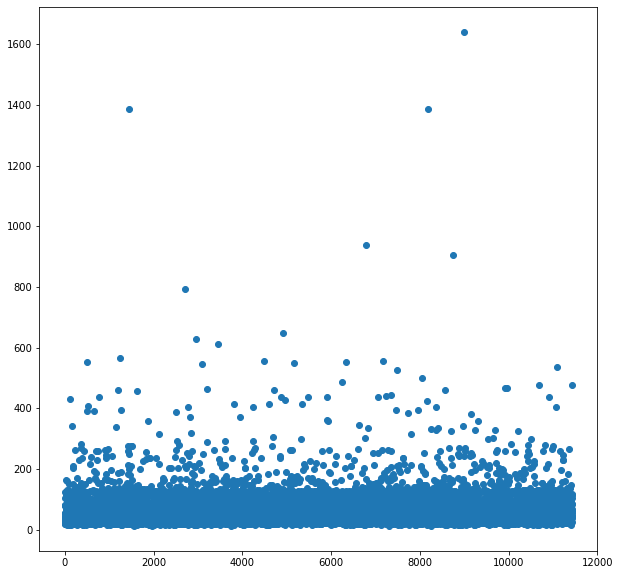

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(range(0,len(lengths)),lengths)

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [48]:
tokenizer = Tokenizer(num_words=300, char_level=True)
tokenizer.fit_on_texts(sites['url'])

In [49]:
data = tokenizer.texts_to_sequences(sites['url'])

In [50]:
word_index = tokenizer.word_index

In [51]:
print(word_index)

{'t': 1, '/': 2, 'e': 3, 'o': 4, 'a': 5, 'p': 6, 's': 7, 'c': 8, 'i': 9, '.': 10, 'r': 11, 'n': 12, 'm': 13, 'h': 14, 'w': 15, 'l': 16, 'd': 17, 'u': 18, 'b': 19, ':': 20, '-': 21, 'f': 22, 'g': 23, '2': 24, '0': 25, '1': 26, 'y': 27, 'k': 28, '3': 29, '4': 30, '7': 31, '5': 32, 'v': 33, '6': 34, '8': 35, '9': 36, 'x': 37, '_': 38, '=': 39, 'j': 40, 'z': 41, 'q': 42, '&': 43, '?': 44, '%': 45, ';': 46, '@': 47, '+': 48, '~': 49, '#': 50, ',': 51, '(': 52, ')': 53, 'ã': 54, 'â': 55, '\x82': 56, '\x83': 57, '!': 58, '$': 59, '`': 60, '[': 61, ']': 62, '{': 63, '}': 64, '*': 65, "'": 66, '<': 67, '\xa0': 68, '^': 69, 'µ': 70, '拠': 71, '傅': 72, '\x91': 73, ' ': 74}


In [52]:
len(word_index)

74

In [53]:
X=sequence.pad_sequences(data, maxlen=300,padding='post')

In [54]:

print(X[0])

[14  1  1  6 20  2  2 15 15 15 10  8 11  3  7  1  4 12 15  4  4 17 10  8
  4 13  2 11  4 18  1  3 11 10  6 14  6  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


In [55]:
len(X[0])

300

In [56]:
target = np.array(sites.label)

In [57]:

print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (11430, 300) Vector dimension of target:  (11430,)


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.20, random_state=33)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM,Dense,Embedding,Dropout,MaxPooling1D

In [61]:
model=Sequential()
model.add(Embedding(input_dim=75,output_dim=128,input_length=300))
model.add(Dropout(0.25))
model.add(Conv1D(filters=256,kernel_size=5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [64]:
model.fit(X_train, target_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(X_test, target_test),callbacks=[early_stop])

Epoch 1/10
143/143 [==============================] - 57s 385ms/step - loss: 0.6953 - accuracy: 0.5074 - val_loss: 0.6890 - val_accuracy: 0.5258
Epoch 2/10
143/143 [==============================] - 54s 377ms/step - loss: 0.6767 - accuracy: 0.5460 - val_loss: 0.6487 - val_accuracy: 0.5818
Epoch 3/10
143/143 [==============================] - 55s 382ms/step - loss: 0.5294 - accuracy: 0.7409 - val_loss: 0.4846 - val_accuracy: 0.7892
Epoch 4/10
143/143 [==============================] - 55s 383ms/step - loss: 0.3882 - accuracy: 0.8284 - val_loss: 0.3729 - val_accuracy: 0.8434
Epoch 5/10
143/143 [==============================] - 54s 378ms/step - loss: 0.3340 - accuracy: 0.8619 - val_loss: 0.3195 - val_accuracy: 0.8666
Epoch 6/10
143/143 [==============================] - 54s 377ms/step - loss: 0.2755 - accuracy: 0.8883 - val_loss: 0.2862 - val_accuracy: 0.8841
Epoch 7/10
143/143 [==============================] - 54s 376ms/step - loss: 0.2360 - accuracy: 0.9074 - val_loss: 0.2751 - val_ac

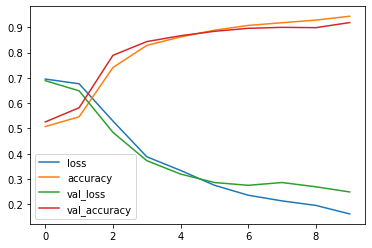

In [65]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [66]:
from tensorflow.keras.models import load_model

In [75]:
model.save('phish_detectorv2.h5')

In [67]:
predictions=model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [69]:
print(predictions)

[[0.00975823]
 [0.9947033 ]
 [0.00961891]
 ...
 [0.00972956]
 [0.98807263]
 [0.99618256]]


In [ ]:
print(predictions)

[[5.9008598e-04]
 [4.1814876e-01]
 [5.9899688e-04]
 ...
 [5.8372261e-04]
 [5.8282557e-04]
 [9.9987054e-01]]


In [70]:
pred=predictions>0.49

In [71]:
pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [72]:
target_test

array([0, 1, 0, ..., 0, 1, 1])

In [73]:
print(classification_report(pred,target_test))

              precision    recall  f1-score   support

       False       0.90      0.92      0.91      1060
        True       0.93      0.91      0.92      1226

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



In [74]:
print(confusion_matrix(pred,target_test))

[[ 979   81]
 [ 105 1121]]


In [76]:
totalPred=model.predict(X)

In [79]:
len(roundPred)

11430

In [80]:
sites['deepLearning']=roundPred

In [81]:
sites.head()

,url,status,label,deepLearning
0,http://www.crestonwood.com/router.php,legitimate,0,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,1
3,http://rgipt.ac.in,legitimate,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,0


In [83]:
from google.colab import files
sites.to_csv('extractedDL.csv') 
files.download('extractedDL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>